<a href="https://colab.research.google.com/github/Nathiya-6718/nn/blob/main/R_NATHIYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving natR.csv to natR (2).csv


In [ ]:
import pandas as pd

# Load dataset, specifying the encoding
df = pd.read_csv('natR.csv', encoding='latin-1') # or 'cp1252', 'iso-8859-1', etc.
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [ ]:
df.info()
df.describe()
df.columns
df.shape




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9900 non-null   object
 1   label   9900 non-null   object
dtypes: object(2)
memory usage: 154.8+ KB


(9900, 2)

In [ ]:
# Missing values
print(df.isnull().sum())

# Duplicates
print("Duplicate rows:", df.duplicated().sum())


Text     0
label    0
dtype: int64
Duplicate rows: 35


In [ ]:
print(df.columns)


Index(['Text', 'label'], dtype='object')


Index(['Text', 'label'], dtype='object')


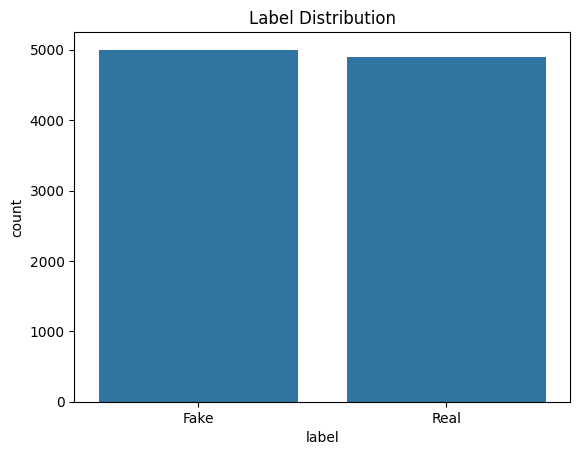

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV, specifying the encoding to avoid the UnicodeDecodeError
df = pd.read_csv('natR.csv', encoding='latin-1')  # or 'cp1252', 'iso-8859-1', etc.

# Show column names
print(df.columns)

# Plot label distribution
sns.countplot(data=df, x='label')
plt.title("Label Distribution")
plt.show()

In [ ]:
X = df['Text']
y = df['label']


In [ ]:
# Convert 'label' to numerical: Fake = 0, Real = 1
df['label'] = df['label'].map({'Fake': 0, 'Real': 1})
y = df['label']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

# Text vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Classifier
model = PassiveAggressiveClassifier()
model.fit(X_train_vec, y_train)


PassiveAggressiveClassifier()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9964646464646465
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       973
           1       1.00      1.00      1.00      1007

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [ ]:
sample_news = ["The government passed a new healthcare reform bill."]
sample_vec = vectorizer.transform(sample_news)
pred = model.predict(sample_vec)
print("Prediction:", "Real" if pred[0] == 1 else "Fake")


Prediction: Real


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.8 MB/s eta 0:00:00


In [1]:
def predict_news(text):
    vector = vectorizer.transform([text])
    result = model.predict(vector)[0]
    return "Real News 📰" if result == 1 else "Fake News ⚠️"


In [4]:
!pip install gradio # Install the gradio library.
import gradio as gr

def predict_news(text):
    return "Real" if "NASA" in text else "Fake"

interface = gr.Interface(
    fn=predict_news,
    inputs="text",
    outputs="text",
    title="🕵️‍♂️ Fake News Detector",
    description="Enter a news headline or article to check if it's Real or Fake."
)

interface.launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0a816abdf9bfda386b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory